(320000,)


Text(0.5, 1.0, 'MFCC')

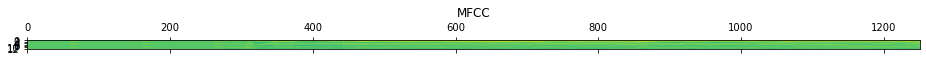

In [4]:
%matplotlib inline
import librosa 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
import os
import pickle
from keras.utils import plot_model
from keras import regularizers

path=r'S:\抖音音频\歌曲数据库\FAFA、雪二 - 想想念念.wav'

y,sr = librosa.load(path,sr=None)

def normalizeVoiceLen(y,normalizedLen):
    nframes=len(y)
    y = np.reshape(y,[nframes,1]).T
    #归一化音频长度
    if(nframes<normalizedLen):
        res=normalizedLen-nframes
        res_data=np.zeros([1,res],dtype=np.float32)
        y = np.reshape(y,[nframes,1]).T
        y=np.c_[y,res_data]
    else:
        y=y[:,0:normalizedLen]
    return y[0]
    
def getNearestLen(framelength,sr):
    framesize = framelength*sr  
    #找到与当前framesize最接近的2的正整数次方
    nfftdict = {}
    lists = [32,64,128,256,512,1024]
    for i in lists:
        nfftdict[i] = abs(framesize - i)
    sortlist = sorted(nfftdict.items(), key=lambda x: x[1])#按与当前framesize差值升序排列
    framesize = int(sortlist[0][0])#取最接近当前framesize的那个2的正整数次方值为新的framesize
    return framesize
    
VOICE_LEN=16000*20
#获得N_FFT的长度
N_FFT=getNearestLen(0.25,sr)
#统一声音范围为前30秒
y=normalizeVoiceLen(y,VOICE_LEN)
print(y.shape)
#提取mfcc特征
mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT, hop_length=int(N_FFT/4))

# 画出特征图，将MFCC可视化。转置矩阵，使得时域是水平的
plt.matshow(mfcc_data)
plt.title('MFCC')

In [50]:
len(mfcc_data.tolist())

20

In [149]:
#提取特征
import os
import pickle

counter=0
fileDirCASIA = r'S:\抖音音频\歌曲数据库'

mfccs={}
mfccs['mad']=[]
mfccs['peaceful']=[]
mfccs['happy']=[]
mfccs['sad']=[]

listdir=os.listdir(fileDirCASIA)
for persondir in listdir:
    if(not r'.' in persondir):
        emotionDirName=os.path.join(fileDirCASIA,persondir)
        emotiondir=os.listdir(emotionDirName)
        for fileName in emotiondir:
            if(fileName[-3:]=='wav'):
                counter+=1
                fn=os.path.join(emotionDirName,fileName)
                print(str(counter)+fn)
                y,sr = librosa.load(fn,sr=None)
                y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
                mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
                mfccs[persondir].append(mfcc_data.tolist())
       
with open('mfcc_feature_dict.pkl', 'wb') as f:
    pickle.dump(mfccs, f)

1S:\抖音音频\歌曲数据库\happy\88rising、Phum Viphurit、Higher Brothers - Lover Boy 88.wav
2S:\抖音音频\歌曲数据库\happy\Austin Mahone、Rich Homie Quan - Send It.wav
3S:\抖音音频\歌曲数据库\happy\Ayo97 _ 周思涵 - 感谢你曾来过.wav
4S:\抖音音频\歌曲数据库\happy\Beatrich - Superstar.wav
5S:\抖音音频\歌曲数据库\happy\BEYOND - 不再犹豫.wav
6S:\抖音音频\歌曲数据库\happy\BEYOND - 情人.wav
7S:\抖音音频\歌曲数据库\happy\BEYOND - 海阔天空.wav
8S:\抖音音频\歌曲数据库\happy\BEYOND - 真的爱你.wav
9S:\抖音音频\歌曲数据库\happy\BigYear - 看好你的女友.wav
10S:\抖音音频\歌曲数据库\happy\BY2 - 爱丫爱丫.wav
11S:\抖音音频\歌曲数据库\happy\Camila Cabello、Young Thug - Havana.wav
12S:\抖音音频\歌曲数据库\happy\DD打D哒 - 哈尼宝贝（纯净版Remix_DD打D哒 Remix）.wav
13S:\抖音音频\歌曲数据库\happy\DJ小鱼儿 - 一生回味一面.wav
14S:\抖音音频\歌曲数据库\happy\Ed Sheeran - Shape of You.wav
15S:\抖音音频\歌曲数据库\happy\Fitz & The Tantrums - HandClap.wav
16S:\抖音音频\歌曲数据库\happy\Freedom Plant Music - Colorful World.wav
17S:\抖音音频\歌曲数据库\happy\G.E.M.邓紫棋 - 我的秘密.wav
18S:\抖音音频\歌曲数据库\happy\Gibb-Z - My hot girl.wav
19S:\抖音音频\歌曲数据库\happy\Gibb-Z、ICE - 陪着你走.wav
20S:\抖音音频\歌曲数据库\happy\Groove Coverage - She (Radio Edit).wav
2

192S:\抖音音频\歌曲数据库\happy\王若琳 - 有你的快乐.wav
193S:\抖音音频\歌曲数据库\happy\白小白 - 最美情侣.wav
194S:\抖音音频\歌曲数据库\happy\白小白、球球 - 宠爱吖.wav
195S:\抖音音频\歌曲数据库\happy\皮卡丘多多 - 我和你.wav
196S:\抖音音频\歌曲数据库\happy\皮卡丘多多 - 我的果汁分你一半.wav
197S:\抖音音频\歌曲数据库\happy\程jiajia - 山楂树の恋.wav
198S:\抖音音频\歌曲数据库\happy\程jiajia - 我爱你 (Live片段).wav
199S:\抖音音频\歌曲数据库\happy\程jiajia - 我爱你.wav
200S:\抖音音频\歌曲数据库\happy\罗百吉 _ 宝贝 - I Miss You.wav
201S:\抖音音频\歌曲数据库\happy\群星 - 让我为你唱一首歌.wav
202S:\抖音音频\歌曲数据库\happy\老狼 _ 任素汐 - 我要你.wav
203S:\抖音音频\歌曲数据库\happy\胖虎 - 拜拜.wav
204S:\抖音音频\歌曲数据库\happy\胡66 - 浪人琵琶.wav
205S:\抖音音频\歌曲数据库\happy\胡66 - 空空如也.wav
206S:\抖音音频\歌曲数据库\happy\至上励合 - 棉花糖.wav
207S:\抖音音频\歌曲数据库\happy\艾热、JelloRio李佳隆 - 星球坠落 (Live).wav
208S:\抖音音频\歌曲数据库\happy\花姐 - 狂浪.wav
209S:\抖音音频\歌曲数据库\happy\花澤香菜 - 恋愛サーキュレーション (恋爱循环).wav
210S:\抖音音频\歌曲数据库\happy\苏大大 - 小崽子.wav
211S:\抖音音频\歌曲数据库\happy\苏芮 _ 张惠妹 - 跟着感觉走.wav
212S:\抖音音频\歌曲数据库\happy\茂茂 - 遥远的你 (原唱).wav
213S:\抖音音频\歌曲数据库\happy\草蜢 - 失恋阵线联盟.wav
214S:\抖音音频\歌曲数据库\happy\菜刀、KT - 我每首情歌都唱给你听.wav
215S:\抖音音频\歌曲数据库\happy\萌萌哒天团 - 帝都

360S:\抖音音频\歌曲数据库\mad\Maroon 5 - One More Night.wav
361S:\抖音音频\歌曲数据库\mad\Matt Terry - Sucker for You.wav
362S:\抖音音频\歌曲数据库\mad\Max Oazo _ Moonessa - Once upon a Time (Bonzana Remix).wav
363S:\抖音音频\歌曲数据库\mad\Mike Williams - Wait Another Day.wav
364S:\抖音音频\歌曲数据库\mad\Milk dog - 烟卷乐队_酷玩乐队-something just like this (Remix).wav
365S:\抖音音频\歌曲数据库\mad\Mirah - Gotta Go Home.wav
366S:\抖音音频\歌曲数据库\mad\Mr. Polska - Move Up(Lost Gravity).wav
367S:\抖音音频\歌曲数据库\mad\Must Save Jane - Into The Fire.wav
368S:\抖音音频\歌曲数据库\mad\Nana - Lonely.wav
369S:\抖音音频\歌曲数据库\mad\Nickelback - When We Stand Together.wav
370S:\抖音音频\歌曲数据库\mad\Nightcore - Angel With A Shotgun.wav
371S:\抖音音频\歌曲数据库\mad\Noel Toto - Pam Pam.wav
372S:\抖音音频\歌曲数据库\mad\Of Monsters And Men - Your Bones.wav
373S:\抖音音频\歌曲数据库\mad\Olly Murs - That Girl.wav
374S:\抖音音频\歌曲数据库\mad\One Direction - Perfect.wav
375S:\抖音音频\歌曲数据库\mad\Otto Knows - Dying For You.wav
376S:\抖音音频\歌曲数据库\mad\P!NK - Just Like Fire.wav
377S:\抖音音频\歌曲数据库\mad\P!NK - Try.wav
378S:\抖音音频\歌曲数据库\mad\Pin

514S:\抖音音频\歌曲数据库\peaceful\Yusee - 选择失忆 (片段).wav
515S:\抖音音频\歌曲数据库\peaceful\Zealot周星星 - 流离.wav
516S:\抖音音频\歌曲数据库\peaceful\Zealot周星星 - 足够.wav
517S:\抖音音频\歌曲数据库\peaceful\Ólafur Arnalds _ Nils Frahm - 01_41.wav
518S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - G線上のアリア.wav
519S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - Love so sweet.wav
520S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - もののけ姫 (幽灵公主).wav
521S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - カノン.wav
522S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - シチリアーノ.wav
523S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - ジュピターの主題~組曲「惑星」より.wav
524S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - トロイメライ.wav
525S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - ノクターン作品9-2.wav
526S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - モーツァルトの子守歌.wav
527S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - 世界の約束 (哈尔的移动城堡主题曲 世界的约定).wav
528S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Relaxing Orgel) - 主よ、人の望みの喜びよ.wav
529S:\抖音音频\歌曲数据库\peaceful\α波オルゴール (Rela

672S:\抖音音频\歌曲数据库\sad\Bebe Rexha - Ferrari.wav
673S:\抖音音频\歌曲数据库\sad\BIGBANG (빅뱅) - Make Love.wav
674S:\抖音音频\歌曲数据库\sad\BIGBANG - GIRLFRIEND.wav
675S:\抖音音频\歌曲数据库\sad\BIGBANG - IF YOU.wav
676S:\抖音音频\歌曲数据库\sad\BIGBANG - LOSER.wav
677S:\抖音音频\歌曲数据库\sad\Billie Eilish - idontwannabeyouanymore.wav
678S:\抖音音频\歌曲数据库\sad\Billie Eilish - wish you were gay.wav
679S:\抖音音频\歌曲数据库\sad\BLACKPINK - STAY.wav
680S:\抖音音频\歌曲数据库\sad\Boyce Avenue _ Bea Miller - We Can't Stop.wav
681S:\抖音音频\歌曲数据库\sad\Charlie Puth - Attention.wav
682S:\抖音音频\歌曲数据库\sad\Charlie Puth - We Don't Talk Anymore.wav
683S:\抖音音频\歌曲数据库\sad\Chris Medina - What Are Words.wav
684S:\抖音音频\歌曲数据库\sad\Colbie Caillat - Try.wav
685S:\抖音音频\歌曲数据库\sad\DAISHI DANCE (ダイシ・ダンス) _ Cécile Corbel - Take Me Hand.wav
686S:\抖音音频\歌曲数据库\sad\DAOKO (ダヲコ) _ 米津玄師 (よねづ けんし) - 打上花火.wav
687S:\抖音音频\歌曲数据库\sad\DiESi - 穿越时空的思念 (Remix).wav
688S:\抖音音频\歌曲数据库\sad\dirt party - 337am.wav
689S:\抖音音频\歌曲数据库\sad\DJ OKAWARI - Luv Letter.wav
690S:\抖音音频\歌曲数据库\sad\DJ Snake _ Justin Bieber - 

843S:\抖音音频\歌曲数据库\sad\杨宗纬 - 凉凉.wav
844S:\抖音音频\歌曲数据库\sad\林俊杰 - 修炼爱情.wav
845S:\抖音音频\歌曲数据库\sad\林俊杰 - 那些你很冒险的梦.wav
846S:\抖音音频\歌曲数据库\sad\林宥嘉 - 说谎.wav
847S:\抖音音频\歌曲数据库\sad\枯木逢春 - 这一生关于你的风景.wav
848S:\抖音音频\歌曲数据库\sad\梁博 - 出现又离开.wav
849S:\抖音音频\歌曲数据库\sad\梁博 - 男孩 (Live).wav
850S:\抖音音频\歌曲数据库\sad\棉子 - 别再对我好.wav
851S:\抖音音频\歌曲数据库\sad\欧邦聪、画风风、小可 - you (bootleg混音版).wav
852S:\抖音音频\歌曲数据库\sad\毛不易 - 消愁.wav
853S:\抖音音频\歌曲数据库\sad\汪苏泷 - 不分手的恋爱.wav
854S:\抖音音频\歌曲数据库\sad\沐泽 - 一吻天荒 (男生版片段).wav
855S:\抖音音频\歌曲数据库\sad\泽亦龙 - 孤幻 (Perfect Mix).wav
856S:\抖音音频\歌曲数据库\sad\浪子兮 - 幻昼 (DJ版).wav
857S:\抖音音频\歌曲数据库\sad\海龟先生 - 男孩别哭.wav
858S:\抖音音频\歌曲数据库\sad\渔圈、欧阳朵 - 失去才懂.wav
859S:\抖音音频\歌曲数据库\sad\灿烈 - Stay With Me.wav
860S:\抖音音频\歌曲数据库\sad\王天戈 - 心安理得.wav
861S:\抖音音频\歌曲数据库\sad\王小帅 - 不是因为寂寞才想你.wav
862S:\抖音音频\歌曲数据库\sad\王菲 - 匆匆那年.wav
863S:\抖音音频\歌曲数据库\sad\王贰浪 - 像鱼.wav
864S:\抖音音频\歌曲数据库\sad\王贰浪 - 虚拟 (DJ8先生版).wav
865S:\抖音音频\歌曲数据库\sad\王靖雯不胖 - 爱，存在.wav
866S:\抖音音频\歌曲数据库\sad\白浩 - 迷人的危险 (DJ版).wav
867S:\抖音音频\歌曲数据库\sad\百变小彤 - 戒烟 (片段).wav
868S:\抖音音频\歌曲数据库

In [181]:
len(mfccs['mad'][0])
labelList = ['mad', 'peaceful', 'happy', 'sad']
for label in labelList:
    for i in range(len(mfccs[label])):
        for j in range(len(mfccs[label][i])):
            a = mfccs[label][i][j]
            b = []
            temp = 0
            for k in range(len(a)):
                temp = temp + a[k]
                if k % 60 == 0 and k > 0:
                    b.append(temp)
                    temp = 0
            mfccs[label][i][j] = b

In [9]:
with open('mfcc_feature_dict.pkl', 'wb') as f:
    pickle.dump(mfccs, f)

NameError: name 'mfccs' is not defined

In [179]:
len(mfccs['mad'][0][0])

1251

In [8]:
%matplotlib inline
import pickle
import os
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical

# #读取特征
# mfccs={}
# with open('mfcc_feature_dict.pkl', 'rb') as f:
#     mfccs=pickle.load(f)

#设置标签
emotionDict={}
emotionDict['mad']=0
emotionDict['peaceful']=1
emotionDict['happy']=2
emotionDict['sad']=3

data=[]
labels=[]
data=data+mfccs['mad']
for i in range(len(mfccs['mad'])):
    labels.append(0)
    
data=data+mfccs['peaceful']
for i in range(len(mfccs['peaceful'])):
    labels.append(1)

data=data+mfccs['happy']
for i in range(len(mfccs['happy'])):
    labels.append(2)

data=data+mfccs['sad']
for i in range(len(mfccs['sad'])):
    labels.append(3)

#设置数据维度
data=np.array(data)
print(data.shape)
data=data.reshape((data.shape[0],data.shape[1],data.shape[2],1))

labels=np.array(labels)
labels=to_categorical(labels)

#数据标准化
DATA_MEAN=np.mean(data,axis=0)
DATA_STD=np.std(data,axis=0)

data-=DATA_MEAN
data/=DATA_STD
#接下来保存好参数，模型预测的时候需要用到。

paraDict={}
paraDict['mean']=DATA_MEAN
paraDict['std']=DATA_STD
paraDict['emotion']=emotionDict
with open('mfcc_model_para_dict.pkl', 'wb') as f:
    pickle.dump(paraDict, f)

NameError: name 'mfccs' is not defined

In [ ]:
paraDict

In [10]:
ratioTrain=0.8
numTrain=int(data.shape[0]*ratioTrain)
permutation = np.random.permutation(data.shape[0])
data = data[permutation,:]
labels = labels[permutation,:]

x_train=data[:numTrain]
x_val=data[numTrain:]
y_train=labels[:numTrain]
y_val=labels[numTrain:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

AttributeError: 'list' object has no attribute 'shape'

In [6]:
from keras.utils import plot_model
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(256,(5,5),activation='relu',input_shape=[13,20,1]))
model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,(5,5),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(4,4)))
model.add(layers.Conv2D(128,(5,5),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(5,5),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D(pool_size=(1,1)))
model.add(layers.Conv2D(256,(5,5),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(4,activation='softmax'))

plot_model(model,to_file='mfcc_model.png',show_shapes=True)
model.summary()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 16, 256)        6656      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 16, 128)        819328    
_________________________________________________________________
dropout (Dropout)            (None, 9, 16, 128)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 8, 128)         409728    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 8, 128)         409728    
____________________________________

In [7]:
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
import keras
callbacks_list=[
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=50,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='speechmfcc_model_checkpoint.h5',
        monitor='val_loss',
        save_best_only=True
    ),
    keras.callbacks.TensorBoard(
        log_dir='speechmfcc_train_log'
    )
]
history=model.fit(x_train, y_train, 
                  batch_size=16, 
                  epochs=200, 
                  validation_data=(x_val, y_val),
                 callbacks=callbacks_list)
model.save('speech_mfcc_model.h5')
model.save_weights('speech_mfcc_model_weight.h5')

NameError: name 'x_train' is not defined

In [51]:
loss, accuracy = model.evaluate(x_val, y_val)
print('test loss', loss)
print('test accuracy', accuracy)

6/6 [==============================] - 0s 37ms/step - loss: 3.4153 - accuracy: 0.3032
test loss 3.4153332710266113
test accuracy 0.30319148302078247


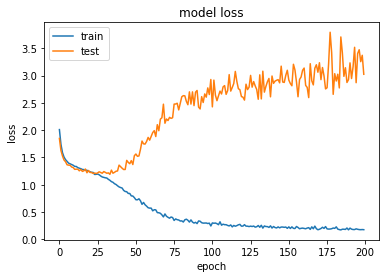

In [186]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

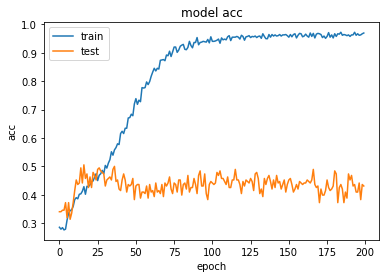

In [187]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [195]:
from keras.models import load_model
import pickle

model=load_model('speech_mfcc_model.h5')
paradict={}
with open('mfcc_model_para_dict.pkl', 'rb') as f:
    paradict=pickle.load(f)
DATA_MEAN=paradict['mean']
DATA_STD=paradict['std']
emotionDict=paradict['emotion']
edr = dict([(i, t) for t, i in emotionDict.items()])

import librosa

filePath=r'S:\抖音音频\歌曲数据库\sad\周传雄 - 黄昏.wav'
y,sr = librosa.load(filePath,sr=None)
y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
feature = mfcc_data.tolist()
for i in range(len(feature)):
    a = feature[i]
    b = []
    temp = 0
    for k in range(len(a)):
        temp = temp + a[k]
        if k % 60 == 0 and k > 0:
            b.append(temp)
            temp = 0
    feature[i] = b
feature=np.array(feature)
feature=feature.reshape((-1,13,20,1))
feature-=DATA_MEAN
feature/=DATA_STD
feature=feature.reshape((-1,13,20,1))
result=model.predict(feature)
index=np.argmax(result, axis=1)[0]
print(edr[index])

13


TypeError: object of type 'float' has no len()

In [200]:
feature = mfcc_data.tolist()
for i in range(len(feature)):
    a = feature[i]
    b = []
    temp = 0
    for k in range(len(a)):
        temp = temp + a[k]
        if k % 60 == 0 and k > 0:
            b.append(temp)
            temp = 0
    feature[i] = b
feature=np.array(feature)
feature=feature.reshape((-1,13,20,1))
feature-=DATA_MEAN
feature/=DATA_STD
feature=feature.reshape((-1,13,20,1))
result=model.predict(feature)
index=np.argmax(result, axis=1)[0]
print(edr[index])

sad


In [142]:
from scipy.io import wavfile
from matplotlib.pyplot import specgram

In [145]:
sample_rate, X = wavfile.read(r'S:\抖音音频\歌曲数据库\peaceful\FAFA、雪二 - 想想念念.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'S:\\抖音音频\\歌曲数据库\\peaceful\\FAFA、雪二 - 想想念念.wav'

In [1]:
import pandas as pd

In [2]:
bgmFrame1 = pd.read_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\完整新数据.csv')

In [29]:
bgmFrame1

,Unnamed: 0,video_like,video_forward,video_comment,goods_name,goods_whole_sale,bgm,language,genre,public_time,emotion,filename
0,0,1.3w,398,486,三妹严选TCSJ0809大容量水杯1450ml,5.9万,漂洋过海来看你 (DJ訫明) - DJ,国语,NaN,2017-01-04,,
1,1,920,31,32,三妹严选TCSJ0809大容量水杯1450ml,5.9万,星月糖 (片段) - 黎林添娇,国语,Pop,2020-05-16,,
2,2,418,10,22,三妹严选TCSJ0809大容量水杯1450ml,5.9万,New Project Vol.3 - DJ,纯音乐,Dance,2019-09-13,,
3,3,728,27,35,三妹严选TCSJ0809大容量水杯1450ml,5.9万,卜卦 (咚鼓版) - 小猫多鱼,纯音乐,Pop,2020-05-18,,
4,4,308,4,12,三妹严选TCSJ0809大容量水杯1450ml,5.9万,牛在飞 - 张冬玲,国语,Pop,2018-01-16,,
...,...,...,...,...,...,...,...,...,...,...,...,...
575,575,35.9w,6865,10000,【官方直营】完美日记哑光唇釉,NaN,Tribute (Dj Fernando Lopez Radio Edit),纯音乐,Dance,2010-08-24,,
576,576,21.4w,833,2031,【官方直营】完美日记哑光唇釉,NaN,昭和少女,NaN,NaN,NaN,,
577,577,18.8w,4862,5817,【官方直营】完美日记哑光唇釉,NaN,Wannabe,韩语,Dance,2020-03-09,,
578,578,16.1w,498,1145,【官方直营】完美日记哑光唇釉,NaN,我喜欢的人总是有女朋友,国语,NaN,2019-06-14,,


In [13]:
import os

from keras.models import load_model
import pickle

model=load_model('speech_mfcc_model.h5')
paradict={}
with open('mfcc_model_para_dict.pkl', 'rb') as f:
    paradict=pickle.load(f)
DATA_MEAN=paradict['mean']
DATA_STD=paradict['std']
emotionDict=paradict['emotion']
edr = dict([(i, t) for t, i in emotionDict.items()])

In [14]:
import librosa

fileDirCASIA = r'S:\抖音音频\BGM\新建文件夹'

bgmList2 = []
emotionList2 = []
listdir=os.listdir(fileDirCASIA)
for fileName in listdir:
    filePath = os.path.join(fileDirCASIA,fileName)
    print(fileName[0:-4])
    print(filePath)
    bgmList2.append(fileName[0:-4])
    y,sr = librosa.load(filePath,sr=None)
    y=normalizeVoiceLen(y,VOICE_LEN)#归一化长度
    mfcc_data=librosa.feature.mfcc(y=y, sr=sr,n_mfcc=13,n_fft=N_FFT,hop_length=int(N_FFT/4))
    feature = mfcc_data.tolist()
    for i in range(len(feature)):
        a = feature[i]
        b = []
        temp = 0
        for k in range(len(a)):
            temp = temp + a[k]
            if k % 60 == 0 and k > 0:
                b.append(temp)
                temp = 0
        feature[i] = b
    feature=np.array(feature)
    feature=feature.reshape((-1,13,20,1))
    feature-=DATA_MEAN
    feature/=DATA_STD
    feature=feature.reshape((-1,13,20,1))
    result=model.predict(feature)
    index=np.argmax(result, axis=1)[0]
    print(edr[index])
    emotionList2.append(edr[index])

221小伙伴 - 遥远的你 (正式版)
S:\抖音音频\BGM\新建文件夹\221小伙伴 - 遥远的你 (正式版).wav
happy
69 - 攀娘举牌 (DJ版)
S:\抖音音频\BGM\新建文件夹\69 - 攀娘举牌 (DJ版).wav
happy
69 - 热播就对了
S:\抖音音频\BGM\新建文件夹\69 - 热播就对了.wav
happy
69 - 能被抢走的都是垃圾
S:\抖音音频\BGM\新建文件夹\69 - 能被抢走的都是垃圾.wav
sad
69 - 蓝色海黑色河 (DJ版)
S:\抖音音频\BGM\新建文件夹\69 - 蓝色海黑色河 (DJ版).wav
happy
69、DJ蒋先生、虞姬、多多 - 热门旋律 (DJ完整版)
S:\抖音音频\BGM\新建文件夹\69、DJ蒋先生、虞姬、多多 - 热门旋律 (DJ完整版).wav
happy
A Corda em Si - Béradêro
S:\抖音音频\BGM\新建文件夹\A Corda em Si - Béradêro.wav
sad
a-ha - Foot Of The Mountain (MTV Unplugged)
S:\抖音音频\BGM\新建文件夹\a-ha - Foot Of The Mountain (MTV Unplugged).wav
happy
AGA - Wonderful U (Demo Version)
S:\抖音音频\BGM\新建文件夹\AGA - Wonderful U (Demo Version).wav
sad
ai8 - 18 Mne Uzhe (重置版)
S:\抖音音频\BGM\新建文件夹\ai8 - 18 Mne Uzhe (重置版).wav
mad
Akon - Right Now (Na Na Na)
S:\抖音音频\BGM\新建文件夹\Akon - Right Now (Na Na Na).wav
mad
Alan Walker - Fade
S:\抖音音频\BGM\新建文件夹\Alan Walker - Fade.wav
sad
Alicia Keys - Caged Bird (Outro)
S:\抖音音频\BGM\新建文件夹\Alicia Keys - Caged Bird (Outro).wav
sad
Andre Gagnon - 小さい

sad
Kaash Paige - LOVE SONGS
S:\抖音音频\BGM\新建文件夹\Kaash Paige - LOVE SONGS.wav
happy
Kadebostany - Early Morning Dreams (Kled Mone Remix)
S:\抖音音频\BGM\新建文件夹\Kadebostany - Early Morning Dreams (Kled Mone Remix).wav
happy
Key Sounds Label - 馬鹿ふたり
S:\抖音音频\BGM\新建文件夹\Key Sounds Label - 馬鹿ふたり.wav
mad
KK星 - 来吧展示 (完整版)
S:\抖音音频\BGM\新建文件夹\KK星 - 来吧展示 (完整版).wav
happy
Koka - Wrap Me in plastic (片段)
S:\抖音音频\BGM\新建文件夹\Koka - Wrap Me in plastic (片段).wav
happy
Lady Gaga - The Cure
S:\抖音音频\BGM\新建文件夹\Lady Gaga - The Cure.wav
mad
LEE HI - 1,2,3,4 (원,투,쓰리,포)
S:\抖音音频\BGM\新建文件夹\LEE HI - 1,2,3,4 (원,투,쓰리,포).wav
happy
Lil Ghost小鬼-王琳凯 - 到底要怎么样
S:\抖音音频\BGM\新建文件夹\Lil Ghost小鬼-王琳凯 - 到底要怎么样.wav
happy
LINKIN PARK - In The End (最后)
S:\抖音音频\BGM\新建文件夹\LINKIN PARK - In The End (最后).wav
mad
Linkin Park、Steve Aoki - Darker Than The Light That Never Bleeds (ChesterForeverSteveAokiRemix)
S:\抖音音频\BGM\新建文件夹\Linkin Park、Steve Aoki - Darker Than The Light That Never Bleeds (ChesterForeverSteveAokiRemix).wav
mad
Little Leon - For You


sad
XXXTentacion - NUMB
S:\抖音音频\BGM\新建文件夹\XXXTentacion - NUMB.wav
sad
Zedd、Jon Bellion - Beautiful Now
S:\抖音音频\BGM\新建文件夹\Zedd、Jon Bellion - Beautiful Now.wav
peaceful
Zella Day - Sacrifice
S:\抖音音频\BGM\新建文件夹\Zella Day - Sacrifice.wav
peaceful
ZeroSeven - 奥利给
S:\抖音音频\BGM\新建文件夹\ZeroSeven - 奥利给.wav
happy
мавлан музыка - всю жизнь
S:\抖音音频\BGM\新建文件夹\мавлан музыка - всю жизнь.wav
happy
さつき が てんこもり、初音ミク - お断りします (我拒绝)
S:\抖音音频\BGM\新建文件夹\さつき が てんこもり、初音ミク - お断りします (我拒绝).wav
happy
りりあ - september调子はどうだい (片段)
S:\抖音音频\BGM\新建文件夹\りりあ - september调子はどうだい (片段).wav
peaceful
一口甜 - 回到夏天 (片段)
S:\抖音音频\BGM\新建文件夹\一口甜 - 回到夏天 (片段).wav
peaceful
一只舟 - 不是所有人都会值得等
S:\抖音音频\BGM\新建文件夹\一只舟 - 不是所有人都会值得等.wav
sad
一只舟 - 爱的太深也是祸
S:\抖音音频\BGM\新建文件夹\一只舟 - 爱的太深也是祸.wav
happy
一风之音 - 女生大姨妈来了到底有多疼#男人们好好疼你女友老婆吧!
S:\抖音音频\BGM\新建文件夹\一风之音 - 女生大姨妈来了到底有多疼#男人们好好疼你女友老婆吧!.wav
sad
一风之音 - 阿米尔汗又火了!配上雷军的《Are you ok》,太魔性了!
S:\抖音音频\BGM\新建文件夹\一风之音 - 阿米尔汗又火了!配上雷军的《Are you ok》,太魔性了!.wav
happy
丁可 - If
S:\抖音音频\BGM\新建文件夹\丁可 - If.wav
sad
丁当 - 我爱他
S:\抖音音频\B

mad
安浩凯 - 快速换装 (热播版)
S:\抖音音频\BGM\新建文件夹\安浩凯 - 快速换装 (热播版).wav
sad
安筱冷 - 一秒变身九尾狐 (DJ版)
S:\抖音音频\BGM\新建文件夹\安筱冷 - 一秒变身九尾狐 (DJ版).wav
happy
宋立伟 - 对手 (Live片段)
S:\抖音音频\BGM\新建文件夹\宋立伟 - 对手 (Live片段).wav
peaceful
宋艳娇 - 酒吧气氛土嗨
S:\抖音音频\BGM\新建文件夹\宋艳娇 - 酒吧气氛土嗨.wav
sad
宋雅萌 - 素颜 (Feat.文韬)
S:\抖音音频\BGM\新建文件夹\宋雅萌 - 素颜 (Feat.文韬).wav
sad
宝石Gem - 野狼disco
S:\抖音音频\BGM\新建文件夹\宝石Gem - 野狼disco.wav
sad
封茗囧菌、洛少爷 - 花灯游
S:\抖音音频\BGM\新建文件夹\封茗囧菌、洛少爷 - 花灯游.wav
mad
小倩 - 不配怀念 (DJheap九天版)
S:\抖音音频\BGM\新建文件夹\小倩 - 不配怀念 (DJheap九天版).wav
happy
小倩 - 不配怀念
S:\抖音音频\BGM\新建文件夹\小倩 - 不配怀念.wav
sad
小匠星、杨智羡 - 做个勇敢的⼩朋友
S:\抖音音频\BGM\新建文件夹\小匠星、杨智羡 - 做个勇敢的⼩朋友.wav
happy
小张、亮仔 - 洪荒之力 (改版)
S:\抖音音频\BGM\新建文件夹\小张、亮仔 - 洪荒之力 (改版).wav
happy
小曼 - 只要你还需要我 (DJ何鹏版)
S:\抖音音频\BGM\新建文件夹\小曼 - 只要你还需要我 (DJ何鹏版).wav
mad
小沈阳、沈春阳 - 你懂得
S:\抖音音频\BGM\新建文件夹\小沈阳、沈春阳 - 你懂得.wav
happy
小猫多鱼 - Kalinka (高潮版)
S:\抖音音频\BGM\新建文件夹\小猫多鱼 - Kalinka (高潮版).wav
sad
小猫多鱼 - september (抖音DJ热搜版)
S:\抖音音频\BGM\新建文件夹\小猫多鱼 - september (抖音DJ热搜版).wav
happy
小猫多鱼 - это ли счастье (热搜版)
S:\抖音音频\BGM\新建文件夹\小猫多

sad
梦然 - 少年
S:\抖音音频\BGM\新建文件夹\梦然 - 少年.wav
peaceful
梦然 - 没有你陪伴真的好孤单
S:\抖音音频\BGM\新建文件夹\梦然 - 没有你陪伴真的好孤单.wav
happy
檀健次 - 微微 (Live)
S:\抖音音频\BGM\新建文件夹\檀健次 - 微微 (Live).wav
happy
欧阳尚尚 - 爱情主演 (DJ何鹏版)
S:\抖音音频\BGM\新建文件夹\欧阳尚尚 - 爱情主演 (DJ何鹏版).wav
happy
欧阳耀莹 - 园游会 (节目)
S:\抖音音频\BGM\新建文件夹\欧阳耀莹 - 园游会 (节目).wav
peaceful
歌者林念 - Stan (热播版)
S:\抖音音频\BGM\新建文件夹\歌者林念 - Stan (热播版).wav
happy
毛小国 - 微笑吧 (女生版)
S:\抖音音频\BGM\新建文件夹\毛小国 - 微笑吧 (女生版).wav
happy
毛阿敏 - 相思
S:\抖音音频\BGM\新建文件夹\毛阿敏 - 相思.wav
sad
水谷広実 - いいのかな#
S:\抖音音频\BGM\新建文件夹\水谷広実 - いいのかな#.wav
sad
永彬Ryan.B、狄迪 - 小鹿乱撞
S:\抖音音频\BGM\新建文件夹\永彬Ryan.B、狄迪 - 小鹿乱撞.wav
happy
江雨恒歪歌 - 爱拼才会赢 (片段)
S:\抖音音频\BGM\新建文件夹\江雨恒歪歌 - 爱拼才会赢 (片段).wav
mad
汪东城 - 我应该去爱你 (DJ版)
S:\抖音音频\BGM\新建文件夹\汪东城 - 我应该去爱你 (DJ版).wav
happy
汪东城 - 我应该去爱你
S:\抖音音频\BGM\新建文件夹\汪东城 - 我应该去爱你.wav
mad
汪苏泷 - 万有引力
S:\抖音音频\BGM\新建文件夹\汪苏泷 - 万有引力.wav
happy
汪苏泷 - 不分手的恋爱(1)
S:\抖音音频\BGM\新建文件夹\汪苏泷 - 不分手的恋爱(1).wav
sad
汪苏泷 - 不分手的恋爱
S:\抖音音频\BGM\新建文件夹\汪苏泷 - 不分手的恋爱.wav
sad
汪苏泷 - 某人
S:\抖音音频\BGM\新建文件夹\汪苏泷 - 某人.wav
sad
汪苏泷、By2 - 有点甜
S:\抖音音频\BG

mad
虹音 - がまんして下さい
S:\抖音音频\BGM\新建文件夹\虹音 - がまんして下さい.wav
sad
虹音 - 乙女日和
S:\抖音音频\BGM\新建文件夹\虹音 - 乙女日和.wav
peaceful
蛋堡 - 关于小熊
S:\抖音音频\BGM\新建文件夹\蛋堡 - 关于小熊.wav
sad
街道办GDC _ 欧阳耀莹 - 春娇与志明
S:\抖音音频\BGM\新建文件夹\街道办GDC _ 欧阳耀莹 - 春娇与志明.wav
sad
裴彤 - 漂洋过海来看你 (DJ版)
S:\抖音音频\BGM\新建文件夹\裴彤 - 漂洋过海来看你 (DJ版).wav
happy
裴维 - 晚安
S:\抖音音频\BGM\新建文件夹\裴维 - 晚安.wav
happy
要不要买菜 - 下山
S:\抖音音频\BGM\新建文件夹\要不要买菜 - 下山.wav
happy
要不要买菜 - 火红的萨日朗
S:\抖音音频\BGM\新建文件夹\要不要买菜 - 火红的萨日朗.wav
happy
许丽静 - 人的这一生 (DJ可乐版)
S:\抖音音频\BGM\新建文件夹\许丽静 - 人的这一生 (DJ可乐版).wav
happy
许光汉 - 兜圈 (片段)
S:\抖音音频\BGM\新建文件夹\许光汉 - 兜圈 (片段).wav
happy
许嵩 - 断桥残雪
S:\抖音音频\BGM\新建文件夹\许嵩 - 断桥残雪.wav
sad
许嵩 - 有何不可
S:\抖音音频\BGM\新建文件夹\许嵩 - 有何不可.wav
happy
许嵩 _ 何曼婷 - 素颜
S:\抖音音频\BGM\新建文件夹\许嵩 _ 何曼婷 - 素颜.wav
sad
许嵩、何曼婷 - 素颜
S:\抖音音频\BGM\新建文件夹\许嵩、何曼婷 - 素颜.wav
sad
许美静 - 阳光总在风雨后
S:\抖音音频\BGM\新建文件夹\许美静 - 阳光总在风雨后.wav
sad
许霖 - 鸿运当头
S:\抖音音频\BGM\新建文件夹\许霖 - 鸿运当头.wav
mad
许飞 - 父亲写的散文诗 (时光版)
S:\抖音音频\BGM\新建文件夹\许飞 - 父亲写的散文诗 (时光版).wav
sad
诗游凉 - 我们背对背拥抱 (DJ版)
S:\抖音音频\BGM\新建文件夹\诗游凉 - 我们背对背拥抱 (DJ版).wav
happy
谢雨锋

In [38]:
emotionFrame2=pd.DataFrame({'filename':np.array(bgmList2),'emotion':np.array(emotionList2)})

In [39]:
emotionFrame2

,filename,emotion
0,221小伙伴 - 遥远的你 (正式版),happy
1,69 - 攀娘举牌 (DJ版),happy
2,69 - 热播就对了,happy
3,69 - 能被抢走的都是垃圾,sad
4,69 - 蓝色海黑色河 (DJ版),happy
...,...,...
699,黑白 - 只对你说 (片段),sad
700,黑龙 - 感谢,happy
701,龙飞 - 入骨相思谁人懂 (DJ何鹏版),happy
702,龚玥 - 烟花三月 (广场舞),sad


In [11]:
def getMaxCommonSubstr(s1, s2):
# 求两个字符串的最长公共子串
# 思想：建立一个二维数组，保存连续位相同与否的状态

    len_s1 = len(s1)
    len_s2 = len(s2)

    # 生成0矩阵，为方便后续计算，多加了1行1列
    # 行: (len_s1+1)
    # 列: (len_s2+1)
    record = [[0 for i in range(len_s2+1)] for j in range(len_s1+1)]    
    
    maxNum = 0          # 最长匹配长度
    p = 0               # 字符串匹配的终止下标 

    for i in range(len_s1):
        for j in range(len_s2):
            if s1[i] == s2[j]:
                # 相同则累加
                record[i+1][j+1] = record[i][j] + 1
                
                if record[i+1][j+1] > maxNum:
                    maxNum = record[i+1][j+1]
                    p = i # 匹配到下标i

    # 返回 子串长度，子串
    return maxNum, s1[p+1-maxNum : p+1]

In [46]:
[lenMatch,strMatch] = getMaxCommonSubstr(s1,s2)
for i in range(len(bgmFrame2)):
    s1 = bgmFrame2.iloc[i]['bgm'].replace(' ','').replace(' (','').replace('）','').replace('-','').replace('DJ','').replace('咚鼓版','').replace('片段','').replace('纯音乐','').replace('未知','').replace('Remix','')
    maxLenMatch = 0
    maxStrMatch = ''
    index = 0
    for j in range(len(emotionFrame2)):
        s2 = emotionFrame2.iloc[j]['filename'].replace(' ','').replace(' (','').replace('）','').replace('-','').replace('DJ','').replace('咚鼓版','').replace('片段','').replace('纯音乐','').replace('未知','').replace('Remix','')
        [lenMatch,strMatch] = getMaxCommonSubstr(s1,s2)
        if lenMatch > maxLenMatch:
            maxLenMatch = lenMatch
            maxStrMatch = strMatch
            index = j
    if maxLenMatch > 0:
        bgmFrame2.loc[i,'emotion'] = emotionFrame2.iloc[index]['emotion']
        bgmFrame2.loc[i,'filename'] = emotionFrame2.iloc[index]['filename']

In [36]:
bgmFrame1.to_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\建模数据补.csv')

In [48]:
bgmFrame2.to_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\建模数据源.csv')

In [40]:
bgmFrame2 = pd.read_csv(r'H:\NJU Documents\抖音数据分析ppt\抖音视频数据.csv')

In [42]:
bgmFrame2['emotion'] = ''
bgmFrame2['filename'] = ''

In [47]:
bgmFrame2

,Unnamed: 0,title,type,similarity,duration,sale,date,bgm,language,genre,public_time,emotion,filename
0,0,遇佳人180X90防晒丝巾2,美妆,1.000000,32,2089,2020/7/3 12:53,不是所有人都会值得等 - 一只舟,国语,Pop,2018-11-04,sad,一只舟 - 不是所有人都会值得等
1,1,爱唯依 Elsissi2020夏季新款日系棉麻拼接蕾丝中袖衬衫衬衣 705,服装,0.707107,7,210,2020/7/3 12:54,여행 - 未知,韩语,Pop,2018-05-24,happy,脸红的思春期(BOL4) - 여행 (旅行)
2,2,妙招姐 100W高品质热熔胶枪+乳白色特粘胶棒 包邮,文具,0.707107,169,6870,2020/7/3 13:01,追梦人 - 纯音乐,国语,Pop,2003-09-01,happy,阿木 - 追梦人
3,3,手工麻绳纳底布鞋,服装,1.000000,15,1870,2020/7/3 13:02,18 Mne Uzhe (重置版) - ai8,纯音乐,NaN,2019-11-14,mad,ai8 - 18 Mne Uzhe (重置版)
4,4,629款裤子（5天发货）,服装,1.000000,7,3950,2020/7/3 13:03,赤伶 - 等什么君,国语,Pop,2018-09-27,happy,等什么君 - 慕夏 (DJ超文艺版)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,829,阿迪达斯官网adidas neo 蛋黄哥联名女装运动套头衫GL7233 GL7234,运动,1.000000,19,19,2020/7/12 18:47,Small Axe (Paul & Price Remix) - Bob Marley & ...,英语,Electronica,2015-11-05,happy,Bob Marley & The Wailers - Small Axe (Paul & P...
830,830,分体加厚小青柑杯,内衣,0.788910,11,742,2020/7/12 18:50,新壶中天 - 崔子格,国语,Pop,2018-08-13,sad,崔子格 - 新壶中天
831,831,禾可可粉色显瘦百搭休闲裤子女宽松直筒2020新款高腰阔腿裤女夏,服装,0.638673,13,127,2020/7/12 18:58,我们背对背拥抱 (抖音DJ) - 未知,NaN,NaN,NaN,happy,诗游凉 - 我们背对背拥抱 (DJ版)
832,832,布丁妹妹 IBEANS宠物卵磷精华素天然狗狗卵磷脂营养补充美毛护眼,医药,1.000000,48,468,2020/7/12 18:59,Memories(Bring Back You)[Originally Performed ...,纯音乐,Pop,2020-07-15,happy,Simon Bacille - Memories(Bring Back You)[Origi...


In [58]:
bgmFrame2['video_like'] = ''
bgmFrame2['video_forward'] = ''
bgmFrame2['video_comment'] = ''
bgmFrame2.rename(columns={'title':'goods_name','sale':'goods_whole_sale'},inplace=True)
bgmFrame2 = bgmFrame2[['video_like','video_forward','video_comment','goods_name','type','similarity','goods_whole_sale','bgm','language','genre','public_time','emotion','filename']]
bgmFrame2

,video_like,video_forward,video_comment,goods_name,type,similarity,goods_whole_sale,bgm,language,genre,public_time,emotion,filename
0,,,,遇佳人180X90防晒丝巾2,美妆,1.000000,2089,不是所有人都会值得等 - 一只舟,国语,Pop,2018-11-04,sad,一只舟 - 不是所有人都会值得等
1,,,,爱唯依 Elsissi2020夏季新款日系棉麻拼接蕾丝中袖衬衫衬衣 705,服装,0.707107,210,여행 - 未知,韩语,Pop,2018-05-24,happy,脸红的思春期(BOL4) - 여행 (旅行)
2,,,,妙招姐 100W高品质热熔胶枪+乳白色特粘胶棒 包邮,文具,0.707107,6870,追梦人 - 纯音乐,国语,Pop,2003-09-01,happy,阿木 - 追梦人
3,,,,手工麻绳纳底布鞋,服装,1.000000,1870,18 Mne Uzhe (重置版) - ai8,纯音乐,NaN,2019-11-14,mad,ai8 - 18 Mne Uzhe (重置版)
4,,,,629款裤子（5天发货）,服装,1.000000,3950,赤伶 - 等什么君,国语,Pop,2018-09-27,happy,等什么君 - 慕夏 (DJ超文艺版)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,,,,阿迪达斯官网adidas neo 蛋黄哥联名女装运动套头衫GL7233 GL7234,运动,1.000000,19,Small Axe (Paul & Price Remix) - Bob Marley & ...,英语,Electronica,2015-11-05,happy,Bob Marley & The Wailers - Small Axe (Paul & P...
830,,,,分体加厚小青柑杯,内衣,0.788910,742,新壶中天 - 崔子格,国语,Pop,2018-08-13,sad,崔子格 - 新壶中天
831,,,,禾可可粉色显瘦百搭休闲裤子女宽松直筒2020新款高腰阔腿裤女夏,服装,0.638673,127,我们背对背拥抱 (抖音DJ) - 未知,NaN,NaN,NaN,happy,诗游凉 - 我们背对背拥抱 (DJ版)
832,,,,布丁妹妹 IBEANS宠物卵磷精华素天然狗狗卵磷脂营养补充美毛护眼,医药,1.000000,468,Memories(Bring Back You)[Originally Performed ...,纯音乐,Pop,2020-07-15,happy,Simon Bacille - Memories(Bring Back You)[Origi...


In [60]:
bgmFrame1

,video_like,video_forward,video_comment,goods_name,goods_whole_sale,bgm,language,genre,public_time,emotion,filename,type,similarity
0,1.3w,398,486,三妹严选TCSJ0809大容量水杯1450ml,5.9万,漂洋过海来看你 (DJ訫明) - DJ,国语,NaN,2017-01-04,happy,漂洋过海来看你 (DJ版),,
1,920,31,32,三妹严选TCSJ0809大容量水杯1450ml,5.9万,星月糖 (片段) - 黎林添娇,国语,Pop,2020-05-16,peaceful,星月糖 (cover_ 黎林添娇),,
2,418,10,22,三妹严选TCSJ0809大容量水杯1450ml,5.9万,New Project Vol.3 - DJ,纯音乐,Dance,2019-09-13,happy,New Project Vol.3,,
3,728,27,35,三妹严选TCSJ0809大容量水杯1450ml,5.9万,卜卦 (咚鼓版) - 小猫多鱼,纯音乐,Pop,2020-05-18,happy,啤啤旋律 (片段),,
4,308,4,12,三妹严选TCSJ0809大容量水杯1450ml,5.9万,牛在飞 - 张冬玲,国语,Pop,2018-01-16,happy,牛在飞,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,35.9w,6865,10000,【官方直营】完美日记哑光唇釉,NaN,Tribute (Dj Fernando Lopez Radio Edit),纯音乐,Dance,2010-08-24,mad,Tribute (Dj Fernando Lopez Radio Edit),,
576,21.4w,833,2031,【官方直营】完美日记哑光唇釉,NaN,昭和少女,NaN,NaN,NaN,mad,佛系少女,,
577,18.8w,4862,5817,【官方直营】完美日记哑光唇釉,NaN,Wannabe,韩语,Dance,2020-03-09,happy,Wannabe,,
578,16.1w,498,1145,【官方直营】完美日记哑光唇釉,NaN,我喜欢的人总是有女朋友,国语,NaN,2019-06-14,peaceful,我喜欢的人总是有女朋友,,


In [59]:
bgmFrame1['type'] = ''
bgmFrame1['similarity'] = ''

In [65]:
bgmAllFrame = pd.merge(bgmFrame1,bgmFrame2,how='outer')

In [62]:
bgmFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   video_like        580 non-null    object
 1   video_forward     580 non-null    object
 2   video_comment     580 non-null    object
 3   goods_name        576 non-null    object
 4   goods_whole_sale  499 non-null    object
 5   bgm               580 non-null    object
 6   language          460 non-null    object
 7   genre             392 non-null    object
 8   public_time       459 non-null    object
 9   emotion           580 non-null    object
 10  filename          580 non-null    object
 11  type              580 non-null    object
 12  similarity        580 non-null    object
dtypes: object(13)
memory usage: 59.0+ KB


In [63]:
bgmFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_like        834 non-null    object 
 1   video_forward     834 non-null    object 
 2   video_comment     834 non-null    object 
 3   goods_name        834 non-null    object 
 4   type              834 non-null    object 
 5   similarity        834 non-null    float64
 6   goods_whole_sale  834 non-null    int64  
 7   bgm               834 non-null    object 
 8   language          658 non-null    object 
 9   genre             557 non-null    object 
 10  public_time       653 non-null    object 
 11  emotion           834 non-null    object 
 12  filename          834 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 84.8+ KB


In [64]:
bgmFrame2[['similarity','goods_whole_sale']] = bgmFrame2[['similarity','goods_whole_sale']].astype('object')

h:\packages\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
bgmAllFrame = bgmAllFrame[['goods_name','type','similarity','goods_whole_sale','video_like','video_comment','video_forward','bgm','language','genre','public_time','emotion','filename']]

In [69]:
bgmAllFrame.to_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\建模数据集Final')

In [70]:
datasetFrame = pd.read_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\音乐数据库待完善数据.csv')

In [72]:
datasetFrame = datasetFrame[['bgm','bpm','genre','language','public_time','mood','emotion','match','like_time','unlike_time']]

In [74]:
datasetFrame.to_csv(r'H:\NJU Documents\抖音数据分析ppt\数据分析\音乐数据库Final.csv')